## Table of Contents

1. <a href="#item1">Introduction: Business Problem</a>    
2. <a href="#item2">Data Acquisition</a> 
3. <a href="#item3">Analysis</a>
4. <a href="#item4">Feature Selection</a>
5. <a href="#item5">Model Training</a>

<a id='item1'></a>

## Introduction: Business Problem

Recklessly driving and not following the traffic rules are the major reasons why there occurs a lot of collisions and accidents leading to deaths. The pedastrians are in the area of severe loss, though there also exists a great loss to the public and private property.

Some of the major reasons of accidents includes:

- Not following the traffics rules
- Talking on the phone
- Drink and Drive
- Driving above the speed limits
- Parking in the Non-Parking areas
- Entering the No-Entry areas
- Not slowing down in the areas of schools and heavy population areas

The project basically focuses on targeting those areas which are the high hotspots for the accidents. These areas have the highest number of accidents in terms of
<ul>
    <li>Fatalities</li>
    <li>Serious Injuries</li>
</ul>

The scope of this project is to determine the most dangerous areas for the 
<ul>
    <li>Pedastrians</li>
    <li>Cyclists</li>
</ul>

Road Accidents are the major cause of death all around the globe. These accidents account for nearly 70% to 80%(Approx) of deaths.

In this model we wish to target the most common reason why road accidents occurs. We look at the most important aspects and attributes for the road accident, targetting the most common and the most fatal roads/areas in terms of most accidents/fatal rates.

<a id='item2'></a>

## Data Acquisition and Cleaning

The Data used for the analysis and prediction contains a lots of rows and columns regarding the collisions statistics. The dataset is rich in attribute and contains a lots of information needed for analysis. It includes severity, fata rates, timezones, no of accidents, types of injuries and many more attributes.

### Data Set Summary

The dataset contains all collisions provided by SPD and recorded by Traffic Records. This includes all types of collisions. Collisions will display at the intersection or mid-block of a segment.<br>
<code>Timeframe:</code> 2004 to Present.

### Data Attributes

The various attributes of the dataset are:
- <code>OBJECTID</code>: unique identifier
- <code>SHAPE</code>: Geometry field
- <code>INCKEY</code>: Long unique key for the incident
- <code>ADDRTYPE</code>: Collision address type:
<ul>
    <li>Alley</li>
    <li>Block</li>
    <li>Intersection</li>
</ul>
- <code>INTKEY</code>: Key that corresponds to the intersection associated with a collision.
- <code>LOCATION</code>: Location where the collision occurred
- <code>SEVERITYCODE</code>: A code that corresponds to the severity of the collision:
<ul>
    <li>3-fatality</li>
    <li>2b-serious injury</li>
    <li>2-injury</li>
    <li>1-prop damage</li>
    <li>0-unknown</li>
</ul>
- <code>WEATHER</code>: weather conditions during the time of the collision.
- <code>ROADCOND</code>: The condition of the road during the collision.
- <code>LIGHTCOND</code>: The light conditions during the collision.
- <code>PEDROWNOTGRNT</code>: Whether or not the pedestrian right of way was not granted. (Y/N)
- <code>SPEEDING</code>: Whether or not speeding was a factor in the collision. (Y/N)
- <code>UNDERINFL</code>: Whether or not a driver involved was under the influence of drugs or alcohol.
- <code>INATTENTIONIND</code>: Whether or not collision was due to inattention. (Y/N)
- <code>JUNCTIONTYPE</code>: Category of junction at which collision took place

- and many more.

Some of the essential attribute for the training and building the model are as follows:
- <code>LOCATION</code>
- <code>WEATHER</code>
- <code>ROADCOND</code>
- <code>LIGHTCOND</code>
- <code>PEDROWNOTGRNT</code>
- <code>SPEEDING</code>
- <code>UNDERINFL</code>
- <code>INATTENTIONIND</code>
- <code>JUNCTIONTYPE</code>

### Few of the State Collision Code

<table style="width:100%">
  <tr>
    <td><i><b>Code</b></i></td>
    <td><i><b>Description</b></i></td> 
  </tr>
  <tr>
    <td>0</td>
    <td>Vehicle Going Straight Hits Pedestrian</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Vehicle Turning Right Hits Pedestrian</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Vehicle Turning Left Hits Pedestrian</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Vehicle Backing Hits Pedestrian</td>
  </tr>
  <tr>
    <td>4</td>
    <td>Vehicle Hits Pedestrian - All Other Actions</td>
  </tr>
  <tr>
    <td>5</td>
    <td>Vehicle Hits Pedestrian - Actions Not Stated</td>
  </tr>
  <tr>
    <td>10</td>
    <td>Entering At Angle</td>
  </tr>
  <tr>
    <td>11</td>
    <td>From Same Direction -Both Going Straight-Both
Moving- Sideswipe</td>
  </tr>
  <tr>
    <td>12</td>
    <td>From Same Direction -Both Going Straight-One
Stopped- Sideswipe </td>
  </tr>
  <tr>
    <td>13</td>
    <td>From Same Direction - Both Going Straight - Both
Moving - Rear End </td>
  </tr>
</table>

You can have a look at the Dataset <a href = 'https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv' target='_blank'>here</a><br>
Description of the data and its attribute can be found <a href = 'https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf' target='_blank'>here</a>.

<a id='item3'></a>

### Analysing the Data Set

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [3]:
cars_df = pd.read_csv('../Week2/Collisions_Data.csv')
cars_df.head()

c:\users\shashi\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [10]:
# Lets look at the dimensions of the dataset
cars_df.shape, cars_df.size

((194673, 38), 7397574)

### Lets look at the types of datas stored in each field

In [11]:
cars_df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64


<AxesSubplot:>

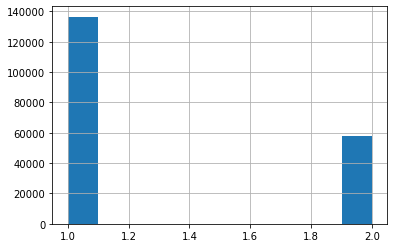

In [12]:
# Lets have a look at the different types of severity code
# along with their value counts

print(cars_df['SEVERITYCODE'].value_counts())
cars_df['SEVERITYCODE'].hist()

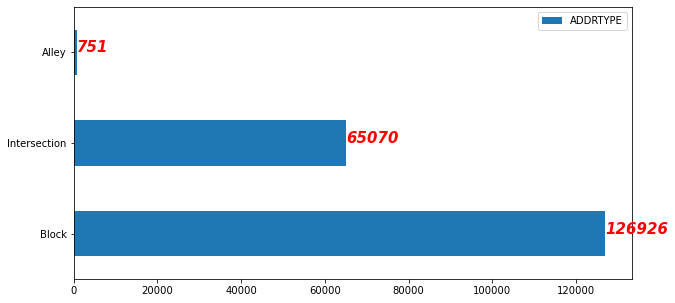

In [13]:
# Number of accidents on eaxh address type

df = pd.DataFrame(cars_df['ADDRTYPE'].value_counts())
df.plot(kind = 'barh', figsize = (10, 5))

y_labels = [i for i in df['ADDRTYPE'].values]
for i, txt in enumerate(y_labels):
    plt.text(txt + 3, i, str(txt), color='red', fontweight='bold', fontstyle = 'italic', fontsize = 15)


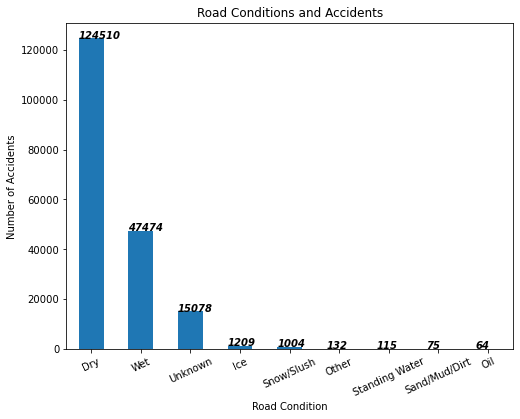

In [14]:
# Number of accidents on the basis of Road Condition

df = pd.DataFrame(cars_df['ROADCOND'].value_counts())
df['ROADCOND'].plot(kind = 'bar', figsize = (8, 6))
x_labels = [i for i in df['ROADCOND'].values]

for i in range(9):
    plt.text(x = i - 0.25, y = x_labels[i] + 2, s = int(x_labels[i]), fontsize = 10, fontstyle = 'italic', fontweight = 'bold')
    
plt.ylabel('Number of Accidents')
plt.xlabel('Road Condition')
plt.xticks(np.arange(9), (df['ROADCOND'].keys()), rotation = 25)
plt.title('Road Conditions and Accidents')
plt.show()

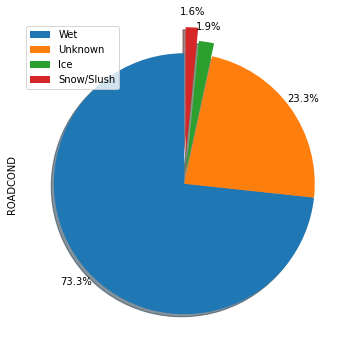

In [16]:
explode_list = [0, 0, 0.1, 0.2]


df = pd.DataFrame(cars_df['ROADCOND'].value_counts())
df['ROADCOND'].iloc[1:5].plot(kind = 'pie',
                    figsize = (15, 6),
                    autopct = '%1.1f%%',
                    startangle = 90,
                    shadow = True,
                    labels = None,
                    pctdistance = 1.12,
                    explode = explode_list
                   )

plt.legend(labels = df[1:5].index, loc = 'upper left')
plt.show()

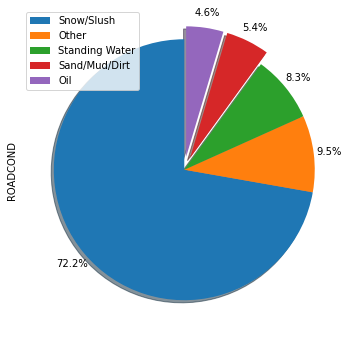

In [17]:
explode_list = [0, 0, 0, 0.1, 0.1]

df = pd.DataFrame(cars_df['ROADCOND'].value_counts())
df['ROADCOND'].iloc[4:9].plot(kind = 'pie',
                    figsize = (15, 6),
                    autopct = '%1.1f%%',
                    startangle = 90,
                    shadow = True,
                    labels = None,
                    pctdistance = 1.12,
                    explode = explode_list
                   )

plt.legend(labels = df[4:9].index, loc = 'upper left')
plt.show()

In [18]:
cars_df['STATUS'].value_counts()

Matched      189786
Unmatched      4887
Name: STATUS, dtype: int64

In [19]:
cars_df['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [20]:
cars_df['UNDERINFL'].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [21]:
cars_df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [22]:
cars_df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [23]:
cars_df['INATTENTIONIND'].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

In [24]:
cars_df['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [25]:
cars_df['HITPARKEDCAR'].value_counts()

N    187457
Y      7216
Name: HITPARKEDCAR, dtype: int64

In [26]:
cars_df['ADDRTYPE'].isna().any()

True

### Plotting accidents on a map

In [29]:
import folium

#Taking first 100 points

lat_lng = cars_df.iloc[:100][['X', 'Y']]

print(lat_lng.shape)
lat_lng.head()

(100, 2)


,X,Y
0,-122.323148,47.703140
1,-122.347294,47.647172
2,-122.334540,47.607871
3,-122.334803,47.604803
4,-122.306426,47.545739


In [30]:
print(lat_lng.isna().any())

lat_lng.dropna(inplace = True)

print(lat_lng.isna().any())

X    True
Y    True
dtype: bool
X    False
Y    False
dtype: bool


In [31]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [33]:
collision_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

incidents = folium.map.FeatureGroup()

for lat, lng in zip(lat_lng.X, lat_lng.Y):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius = 5,
            color = 'yellow',
            fill = True,
            fill_color = 'blue',
            fill_opacity = 0.6
        )
    )
    
# add pop-up text to each marker on the map
latitudes = list(lat_lng.Y)
longitudes = list(lat_lng.X)
#labels = list(df_incidents.Category)

for lat, lng in zip(latitudes, longitudes):#, labels):
    folium.Marker([lat, lng]).add_to(collision_map)    
    
# add incidents to map
   
collision_map.add_child(incidents)

# Zoom out and Zoom in to seattle to view.

#### Grouping the Number of Accidents

In [34]:
lat_lng = cars_df.iloc[:500][['X', 'Y']]

print(lat_lng.isna().any())
lat_lng.dropna(inplace = True)
print(lat_lng.isna().any())

X    True
Y    True
dtype: bool
X    False
Y    False
dtype: bool


In [35]:
from folium import plugins

collision_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

incidents = plugins.MarkerCluster().add_to(collision_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng in zip(lat_lng.Y, lat_lng.X):
    folium.Marker(
        location=[lat, lng],
        icon=None,
    ).add_to(incidents)

# display map
collision_map

# Zoom out and Zoom in to seattle to view. 

<a id='item4'></a>

### Feature Selection

In [37]:
feature_set = cars_df[['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'HITPARKEDCAR']]
feature_set.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
0,2,Intersection,Angles,NaN,N,Overcast,Wet,Daylight,NaN,N
1,1,Block,Sideswipe,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,N
2,1,Block,Parked Car,NaN,0,Overcast,Dry,Daylight,NaN,N
3,1,Block,Other,NaN,N,Clear,Dry,Daylight,NaN,N
4,2,Intersection,Angles,NaN,0,Raining,Wet,Daylight,NaN,N


In [38]:
feature_set['ADDRTYPE'].replace(to_replace = ['Alley', 'Intersection','Block'], value = [0,1,2], inplace = True)

feature_set.head()

c:\users\shashi\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
0,2,1.0,Angles,NaN,N,Overcast,Wet,Daylight,NaN,N
1,1,2.0,Sideswipe,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,N
2,1,2.0,Parked Car,NaN,0,Overcast,Dry,Daylight,NaN,N
3,1,2.0,Other,NaN,N,Clear,Dry,Daylight,NaN,N
4,2,1.0,Angles,NaN,0,Raining,Wet,Daylight,NaN,N


In [39]:
feature_set['COLLISIONTYPE'].replace(
    to_replace = [
        'Parked Car',
        'Angles',
        'Rear Ended',
        'Other',
        'Sideswipe',
        'Left Turn',
        'Pedestrian',
        'Cycles',
        'Right Turn',
        'Head On'
    ],
    value = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    inplace = True
)
feature_set.head()

c:\users\shashi\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
0,2,1.0,1.0,NaN,N,Overcast,Wet,Daylight,NaN,N
1,1,2.0,4.0,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,N
2,1,2.0,0.0,NaN,0,Overcast,Dry,Daylight,NaN,N
3,1,2.0,3.0,NaN,N,Clear,Dry,Daylight,NaN,N
4,2,1.0,1.0,NaN,0,Raining,Wet,Daylight,NaN,N


In [40]:
feature_set['INATTENTIONIND'].replace(to_replace = ['Y', np.nan], value = [1, 0], inplace = True)
feature_set.head()

c:\users\shashi\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
0,2,1.0,1.0,0,N,Overcast,Wet,Daylight,NaN,N
1,1,2.0,4.0,0,0,Raining,Wet,Dark - Street Lights On,NaN,N
2,1,2.0,0.0,0,0,Overcast,Dry,Daylight,NaN,N
3,1,2.0,3.0,0,N,Clear,Dry,Daylight,NaN,N
4,2,1.0,1.0,0,0,Raining,Wet,Daylight,NaN,N


In [41]:
feature_set['UNDERINFL'].replace(to_replace = ['0','1'], value = [0,1], inplace = True)
feature_set['UNDERINFL'].replace(to_replace = ['N','Y', np.nan], value = [0,1,0], inplace = True)
feature_set['UNDERINFL'].dropna()
feature_set.head()

c:\users\shashi\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
0,2,1.0,1.0,0,0,Overcast,Wet,Daylight,NaN,N
1,1,2.0,4.0,0,0,Raining,Wet,Dark - Street Lights On,NaN,N
2,1,2.0,0.0,0,0,Overcast,Dry,Daylight,NaN,N
3,1,2.0,3.0,0,0,Clear,Dry,Daylight,NaN,N
4,2,1.0,1.0,0,0,Raining,Wet,Daylight,NaN,N


In [42]:
feature_set['WEATHER'].replace(
    to_replace = [
        'Clear',       
        'Raining',
        'Overcast',
        'Unknown',
        'Snowing',
        'Other',
        'Fog/Smog/Smoke',
        'Sleet/Hail/Freezing Rain',
        'Blowing Sand/Dirt',
        'Severe Crosswind',
        'Partly Cloudy',
    ],
    value = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    inplace = True
)
feature_set.head()

c:\users\shashi\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
0,2,1.0,1.0,0,0,2.0,Wet,Daylight,NaN,N
1,1,2.0,4.0,0,0,1.0,Wet,Dark - Street Lights On,NaN,N
2,1,2.0,0.0,0,0,2.0,Dry,Daylight,NaN,N
3,1,2.0,3.0,0,0,0.0,Dry,Daylight,NaN,N
4,2,1.0,1.0,0,0,1.0,Wet,Daylight,NaN,N


In [43]:
feature_set['ROADCOND'].replace(
    to_replace = [
        'Dry',       
        'Wet',
        'Unknown',
        'Ice',
        'Snow/Slush',
        'Other',
        'Standing Water',
        'Sand/Mud/Dirt',
        'Oil'
    ],
    value = [0, 1, 2, 3, 4, 5, 6, 7, 8],
    inplace = True
)
feature_set.head()

c:\users\shashi\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
0,2,1.0,1.0,0,0,2.0,1.0,Daylight,NaN,N
1,1,2.0,4.0,0,0,1.0,1.0,Dark - Street Lights On,NaN,N
2,1,2.0,0.0,0,0,2.0,0.0,Daylight,NaN,N
3,1,2.0,3.0,0,0,0.0,0.0,Daylight,NaN,N
4,2,1.0,1.0,0,0,1.0,1.0,Daylight,NaN,N


In [44]:
feature_set['LIGHTCOND'].replace(
    to_replace = [
        'Daylight',
        'Dark - Street Lights On',
        'Unknown',
        'Dusk',
        'Dawn',
        'Dark - No Street Lights',
        'Dark - Street Lights Off',
        'Other',
        'Dark - Unknown Lighting'
    ],
    value = [0, 1, 2, 3, 4, 5, 6, 7, 8],
    inplace = True
)
feature_set.head()

c:\users\shashi\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
0,2,1.0,1.0,0,0,2.0,1.0,0.0,NaN,N
1,1,2.0,4.0,0,0,1.0,1.0,1.0,NaN,N
2,1,2.0,0.0,0,0,2.0,0.0,0.0,NaN,N
3,1,2.0,3.0,0,0,0.0,0.0,0.0,NaN,N
4,2,1.0,1.0,0,0,1.0,1.0,0.0,NaN,N


In [45]:
feature_set['SPEEDING'].replace(to_replace = ['Y', np.nan], value = [1, 0], inplace = True)
feature_set.head()

c:\users\shashi\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
0,2,1.0,1.0,0,0,2.0,1.0,0.0,0,N
1,1,2.0,4.0,0,0,1.0,1.0,1.0,0,N
2,1,2.0,0.0,0,0,2.0,0.0,0.0,0,N
3,1,2.0,3.0,0,0,0.0,0.0,0.0,0,N
4,2,1.0,1.0,0,0,1.0,1.0,0.0,0,N


In [46]:
feature_set['HITPARKEDCAR'].replace(to_replace = ['Y', 'N'], value = [1, 0], inplace = True)
feature_set.head()

c:\users\shashi\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
0,2,1.0,1.0,0,0,2.0,1.0,0.0,0,0
1,1,2.0,4.0,0,0,1.0,1.0,1.0,0,0
2,1,2.0,0.0,0,0,2.0,0.0,0.0,0,0
3,1,2.0,3.0,0,0,0.0,0.0,0.0,0,0
4,2,1.0,1.0,0,0,1.0,1.0,0.0,0,0


In [47]:
feature_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   ADDRTYPE        192747 non-null  float64
 2   COLLISIONTYPE   189769 non-null  float64
 3   INATTENTIONIND  194673 non-null  int64  
 4   UNDERINFL       194673 non-null  int64  
 5   WEATHER         189592 non-null  float64
 6   ROADCOND        189661 non-null  float64
 7   LIGHTCOND       189503 non-null  float64
 8   SPEEDING        194673 non-null  int64  
 9   HITPARKEDCAR    194673 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 14.9 MB


In [48]:
feature_set.dropna(inplace = True)
feature_set.isna().any()

c:\users\shashi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


SEVERITYCODE      False
ADDRTYPE          False
COLLISIONTYPE     False
INATTENTIONIND    False
UNDERINFL         False
WEATHER           False
ROADCOND          False
LIGHTCOND         False
SPEEDING          False
HITPARKEDCAR      False
dtype: bool

In [49]:
feature_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187504 entries, 0 to 194672
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    187504 non-null  int64  
 1   ADDRTYPE        187504 non-null  float64
 2   COLLISIONTYPE   187504 non-null  float64
 3   INATTENTIONIND  187504 non-null  int64  
 4   UNDERINFL       187504 non-null  int64  
 5   WEATHER         187504 non-null  float64
 6   ROADCOND        187504 non-null  float64
 7   LIGHTCOND       187504 non-null  float64
 8   SPEEDING        187504 non-null  int64  
 9   HITPARKEDCAR    187504 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 15.7 MB


<a id='item5'></a>

### Model Training

#### Feature Variables

In [40]:
X = feature_set[['ADDRTYPE', 'COLLISIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'HITPARKEDCAR']]

In [41]:
X = X.values
X[0:5]

array([[1., 1., 0., 0., 2., 1., 0., 0., 0.],
       [2., 4., 0., 0., 1., 1., 1., 0., 0.],
       [2., 0., 0., 0., 2., 0., 0., 0., 0.],
       [2., 3., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 1., 1., 0., 0., 0.]])

#### Traget Labels

In [42]:
y = feature_set[['SEVERITYCODE']].values
y[0:5]

array([[2],
       [1],
       [1],
       [1],
       [2]], dtype=int64)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.25, random_state = 4)

X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

print("Train Set Size: ", X_train.shape)
print("Test Set Size: ", X_test.shape)

Train Set Size:  (140628, 9)
Test Set Size:  (46876, 9)


In [44]:
from sklearn import svm

In [45]:
clf = svm.SVC(kernel = 'rbf', verbose = True)

In [46]:
clf.fit(X_train, np.ravel(y_train))

SVC()

In [50]:
y_pred = clf.predict(X_test)
y_pred[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [52]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.74      0.97      0.84     32659
           2       0.75      0.21      0.33     14217

    accuracy                           0.74     46876
   macro avg       0.74      0.59      0.59     46876
weighted avg       0.74      0.74      0.68     46876

Confusion matrix, without normalization
[[31642  1017]
 [11185  3032]]


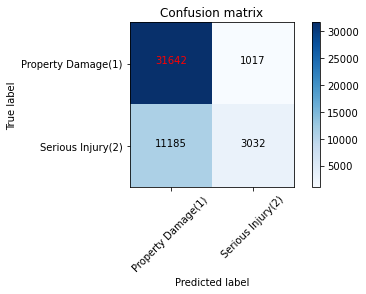

In [53]:
cnf_mtx = confusion_matrix(y_test, y_pred, labels = [1, 2])
np.set_printoptions(precision = 2)

print(classification_report(y_test, y_pred))

plt.figure()
plot_confusion_matrix(cnf_mtx, classes = ['Property Damage(1)', 'Serious Injury(2)'])

In [54]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average = 'weighted')

0.6847770448435732

In [56]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_pred)

0.7216951008119697